# David Haase (NYC-MHTN-DS-042219)
#### Project 1: King County Housing Data Analysis 
The following jupyter notebook walks you through my project.

## Project Introduction
Import standard libraries in standard notation
## [code] Import Standard Libraries

In [1]:
# import libraries
import pandas as pd
import numpy as np
import math as mt
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as stats
from sklearn.linear_model import LinearRegression

## [code] Define Utility Functions

In [2]:
def get_data(data_file):
    try:
        data = pd.read_csv(data_file)
    except Exception as e:
        print(e) 
    return data

## [code] Main program begins here
* Define your project variables
* Set up your sample and population data

In [3]:
data_file = 'kc_house_data.csv'
sample_percent = 0.8

raw = get_data(data_file)

In [4]:
raw.shape

(21597, 21)

In [5]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [6]:
raw.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [7]:
raw.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

## Start the first round of data cleaning: data types
### Create a "Dropbox" Cell -- kernel specific only so I don't have to restart all the time


In [8]:
# Get rid of the id column (domain knowledge)
df = raw.drop('id', axis=1)

### id, date and engineered date features

In [9]:
# Convert the date STR to date DATE
df.date = pd.to_datetime(df.date, format='%m/%d/%Y')

# Engineer new features: Day of the week, Month, Age
df['Dayofweek'] = df.date.dt.dayofweek
df['Month'] = df.date.dt.month
df['Age'] = df.date.dt.year - df.yr_built

# So, get rid of the original columns
df.drop(['date', 'yr_built'], axis=1, inplace=True)

### yr_renovated
* Strange to have floats
* 17.8% = NaNs (n=3842)
* 78.8% = 0.0 (n=17,011), presumably never remodeled

In [10]:
df['yr_renovated'].isna().sum()
df['yr_renovated'].value_counts()

# Convert to binary category: Renovated?  
# Deal with NaNs 

# For now, remove
df.drop('yr_renovated', axis=1, inplace=True)

### sqft_basement
* Simply conversion to int() fails, why?
* 2.1% = '?', n=454
* 61.5% '0.0' or '0.00' n=13,280; presumably this means no basement
#### Decision
* Convert to category: _Has Basement?_ and split the '?' evenly
* Deleting feature for now

In [11]:
# Converting sqft_basement to int() fails, why?
df['sqft_basement'].value_counts()

#For now, drop it
df.drop('sqft_basement', axis=1, inplace=True)

In [12]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,zipcode,lat,long,sqft_living15,sqft_lot15,Dayofweek,Month,Age
0,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,98178,47.5112,-122.257,1340,5650,0,10,59
1,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,98125,47.7210,-122.319,1690,7639,1,12,63
2,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,98028,47.7379,-122.233,2720,8062,2,2,82
3,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,98136,47.5208,-122.393,1360,5000,1,12,49
4,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,98074,47.6168,-122.045,1800,7503,2,2,28


### view
* Value counts look clean
* < 0.3% = NaN, n=63 counts
#### Decision
* Let's just convert those to the median which is: 0.00

In [13]:
df['view'].value_counts()
df['view'] = df['view'].fillna(value=df['view'].median())
df.view.value_counts()

0.0    19485
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64

### waterfront
* 11.0% = NaN, n=2,376
* Value Counts are binary, 1 (n=146) or 0 (n=19,075)
* 0.8% probability that it is waterfront
#### Decision
* Convert NaNs to higher probability: 0
* Convert to category with dummy variables

In [14]:
# Fill the NaNs with the higher probable value
df.waterfront.value_counts()
df['waterfront'] = df['waterfront'].fillna(value=0)

# Converting to categories
wtf_dummies = pd.get_dummies(df['waterfront'], prefix="wtf_")
df = pd.concat([df, wtf_dummies], axis=1)

# Now drop the column
df.drop('waterfront', axis=1, inplace = True)
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,zipcode,lat,long,sqft_living15,sqft_lot15,Dayofweek,Month,Age,wtf__0.0,wtf__1.0
0,221900.0,3,1.00,1180,5650,1.0,0.0,3,7,1180,98178,47.5112,-122.257,1340,5650,0,10,59,1,0
1,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,2170,98125,47.7210,-122.319,1690,7639,1,12,63,1,0
2,180000.0,2,1.00,770,10000,1.0,0.0,3,6,770,98028,47.7379,-122.233,2720,8062,2,2,82,1,0
3,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,1050,98136,47.5208,-122.393,1360,5000,1,12,49,1,0
4,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,1680,98074,47.6168,-122.045,1800,7503,2,2,28,1,0


In [15]:
# Fill the NaNs with the higher probable value
df.zipcode.value_counts()
df.condition.value_counts()
df.grade.value_counts()
df.view.value_counts()

# # Converting to categories
# wtf_dummies = pd.get_dummies(df['waterfront'], prefix="wtf_")
# df = pd.concat([df, wtf_dummies], axis=1)

# # Now drop the column
# df.drop('waterfront', axis=1, inplace = True)
# df.head()

0.0    19485
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64

## [code] Check for normal distributions

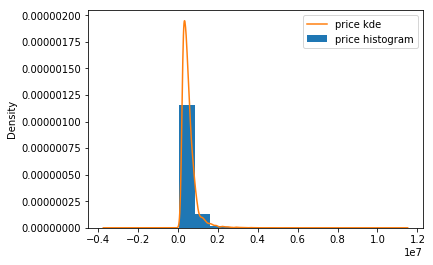

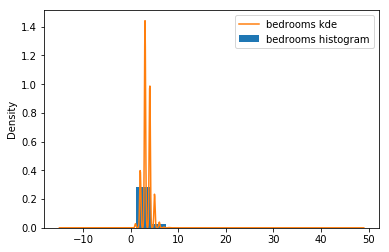

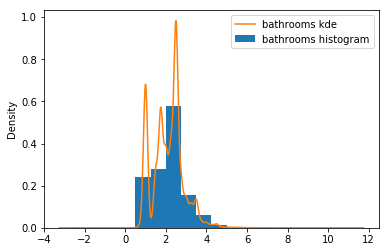

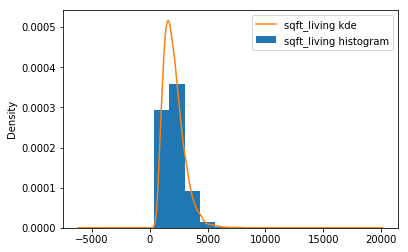

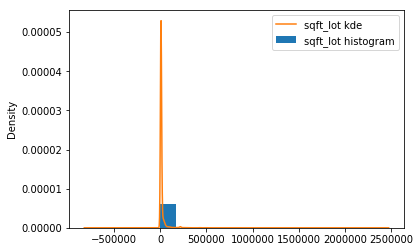

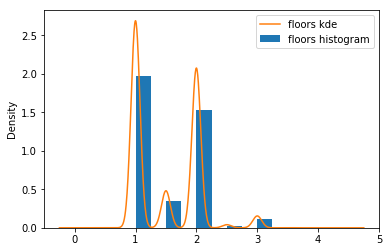

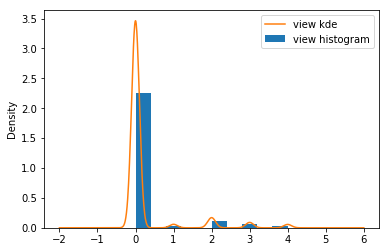

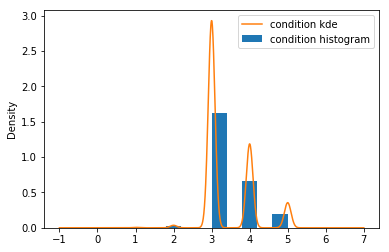

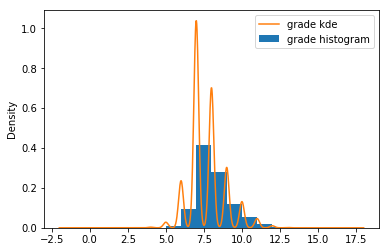

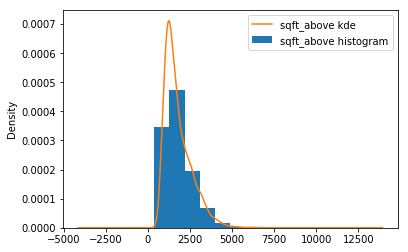

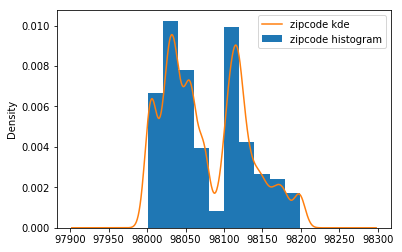

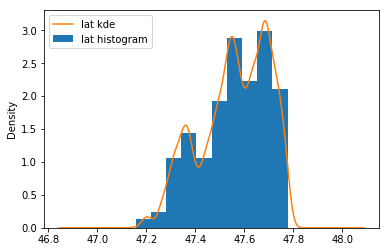

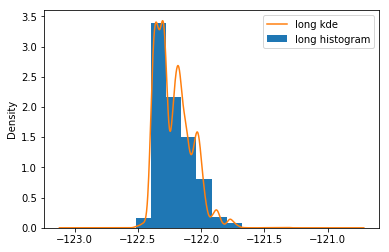

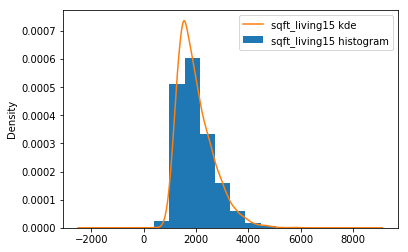

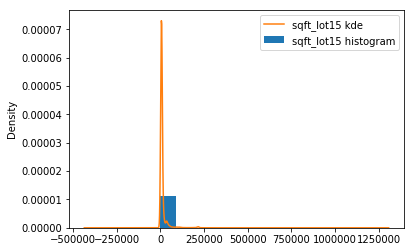

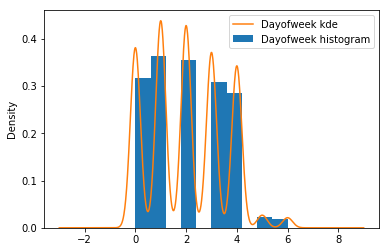

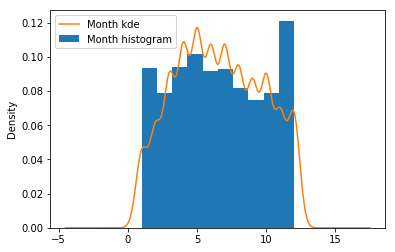

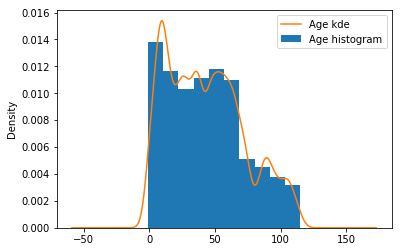

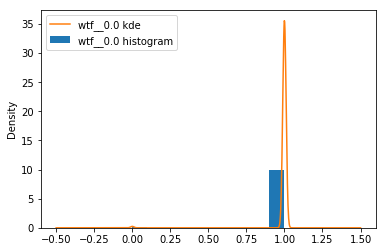

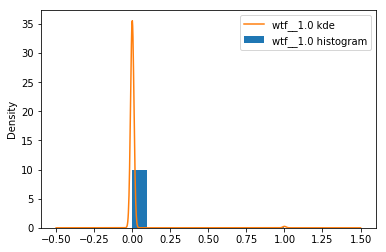

In [16]:
for column in df:
    df[column].plot.hist(density=True, label = column+' histogram')
    df[column].plot.kde(label=column+' kde')
    plt.legend()
    plt.show()

### df.price:  our target seems abnormal, 
* Trying logorithm

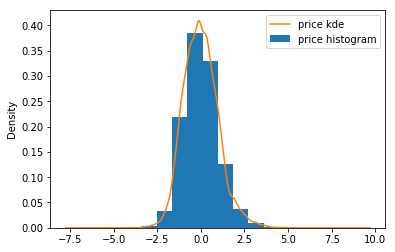

In [17]:
logprice = np.log(df['price'])
scaled_price = (logprice-np.mean(logprice))/np.sqrt(np.var(logprice))
df.price = scaled_price
df.price.plot.hist(density=True, label = 'price'+' histogram')
df.price.plot.kde(label='price'+' kde')
plt.legend()
plt.show()

In [ ]:
for column in df:
    df[column].plot.hist(density=True, label = column+' histogram')
    df[column].plot.kde(label=column+' kde')
    plt.legend()
    plt.show()

In [ ]:
fig, axs = plt.subplots(1, len(df.columns), sharey=True, figsize=(24, 6))
for idx, channel in enumerate(df.columns):
    df.plot(kind='scatter', x=channel, y='price', ax=axs[idx], label=channel)
plt.legend()
plt.show()

In [ ]:
pd.plotting.scatter_matrix(df,figsize  = [9, 9]);

In [18]:
df.corr().sort_values(by=['price'], ascending=False)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,zipcode,lat,long,sqft_living15,sqft_lot15,Dayofweek,Month,Age,wtf__0.0,wtf__1.0
price,1.000000,0.343360,0.551249,0.695185,0.100025,0.310630,0.344653,0.038918,0.703720,0.601579,-0.038788,0.448837,0.050862,0.619326,0.092281,-0.002217,-0.013064,-0.080499,-0.170720,0.170720
grade,0.703720,0.356563,0.665838,0.762779,0.114731,0.458794,0.249082,-0.146896,1.000000,0.756073,-0.185771,0.113575,0.200341,0.713867,0.120981,0.002406,0.008989,-0.448322,-0.082818,0.082818
sqft_living,0.695185,0.578212,0.755758,1.000000,0.173453,0.353953,0.281715,-0.059445,0.762779,0.876448,-0.199802,0.052155,0.241214,0.756402,0.184342,0.005260,0.012112,-0.318592,-0.104637,0.104637
sqft_living15,0.619326,0.393406,0.569884,0.756402,0.144763,0.280102,0.278928,-0.093072,0.713867,0.731767,-0.279299,0.048679,0.335626,1.000000,0.183515,0.004308,0.002513,-0.326697,-0.083823,0.083823
sqft_above,0.601579,0.479386,0.686668,0.876448,0.184139,0.523989,0.166017,-0.158904,0.756073,1.000000,-0.261570,-0.001199,0.344842,0.731767,0.195077,0.006223,0.010153,-0.424386,-0.071778,0.071778
bathrooms,0.551249,0.514508,1.000000,0.755758,0.088373,0.502582,0.186016,-0.126479,0.665838,0.686668,-0.204786,0.024280,0.224903,0.569884,0.088303,0.010466,0.007543,-0.507561,-0.063629,0.063629
lat,0.448837,-0.009951,0.024280,0.052155,-0.085514,0.049239,0.006321,-0.015102,0.113575,-0.001199,0.266742,1.000000,-0.135371,0.048679,-0.086139,-0.016476,0.014995,0.147898,0.012157,-0.012157
view,0.344653,0.078354,0.186016,0.281715,0.075054,0.028414,1.000000,0.045622,0.249082,0.166017,0.085059,0.006321,-0.077702,0.278928,0.073083,0.006858,-0.005161,0.054467,-0.380543,0.380543
bedrooms,0.343360,1.000000,0.514508,0.578212,0.032471,0.177944,0.078354,0.026496,0.356563,0.479386,-0.154092,-0.009951,0.132054,0.393406,0.030690,0.009673,-0.001046,-0.155817,0.002127,-0.002127
floors,0.310630,0.177944,0.502582,0.353953,-0.004814,1.000000,0.028414,-0.264075,0.458794,0.523989,-0.059541,0.049239,0.125943,0.280102,-0.010722,0.002431,0.014245,-0.489514,-0.020797,0.020797
